In [ ]:
import os
import shutil

# Paths
DATA_SOURCE_PATH = '/content/E-commerce Customer Behavior - Sheet1.csv'
KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

# Clean up existing input and working directories
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# Create symlinks (if not already present)
try:
    os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
    pass
try:
    os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
    pass

# Copy the data file to the Kaggle input directory
destination_path = os.path.join(KAGGLE_INPUT_PATH, os.path.basename(DATA_SOURCE_PATH))
shutil.copyfile(DATA_SOURCE_PATH, destination_path)

print(f'Data source copied to: {destination_path}')



Data source copied to: /kaggle/input/E-commerce Customer Behavior - Sheet1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/E-commerce Customer Behavior - Sheet1.csv")

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,175
1,Female,173


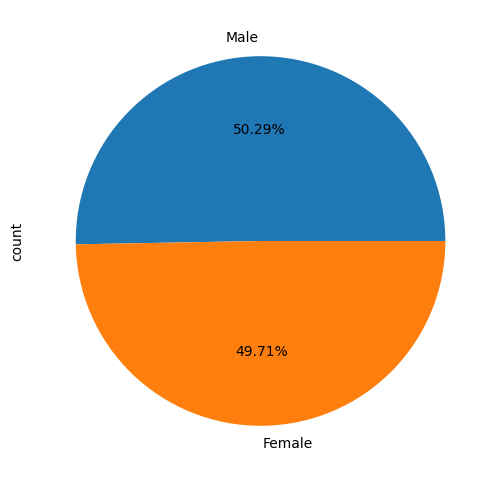

In [ ]:
# visualize the Gender column
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

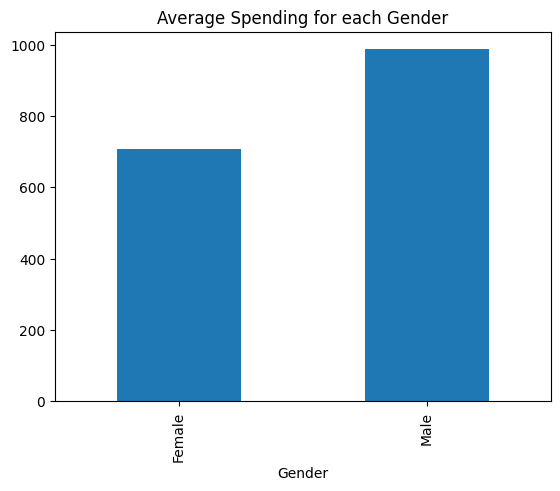

In [ ]:
# find the relation between the average spending and gender
gender_spend = df.groupby('Gender')['Total Spend'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

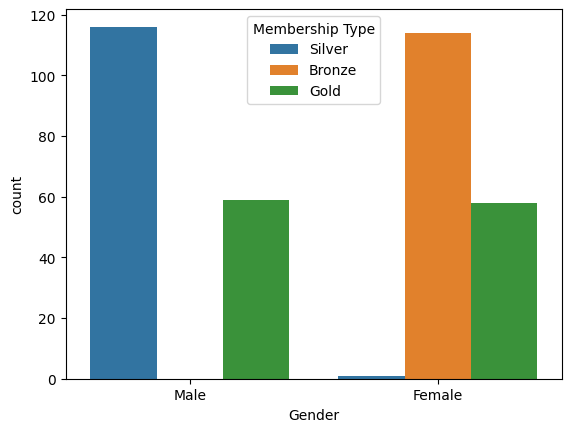

In [ ]:
# visualize the gender && membership type
gender_membership = df[['Gender', 'Membership Type']].value_counts().reset_index()
sns.barplot(data=gender_membership, x='Gender', y='count', hue='Membership Type')
plt.show()

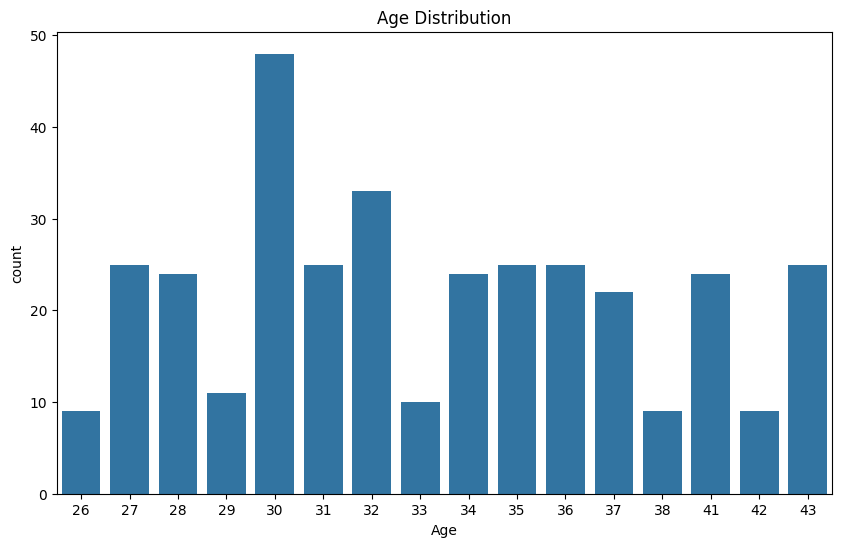

In [ ]:
# visualize the age column
age_data = df['Age'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='Age', y='count')
plt.title("Age Distribution")
plt.show()

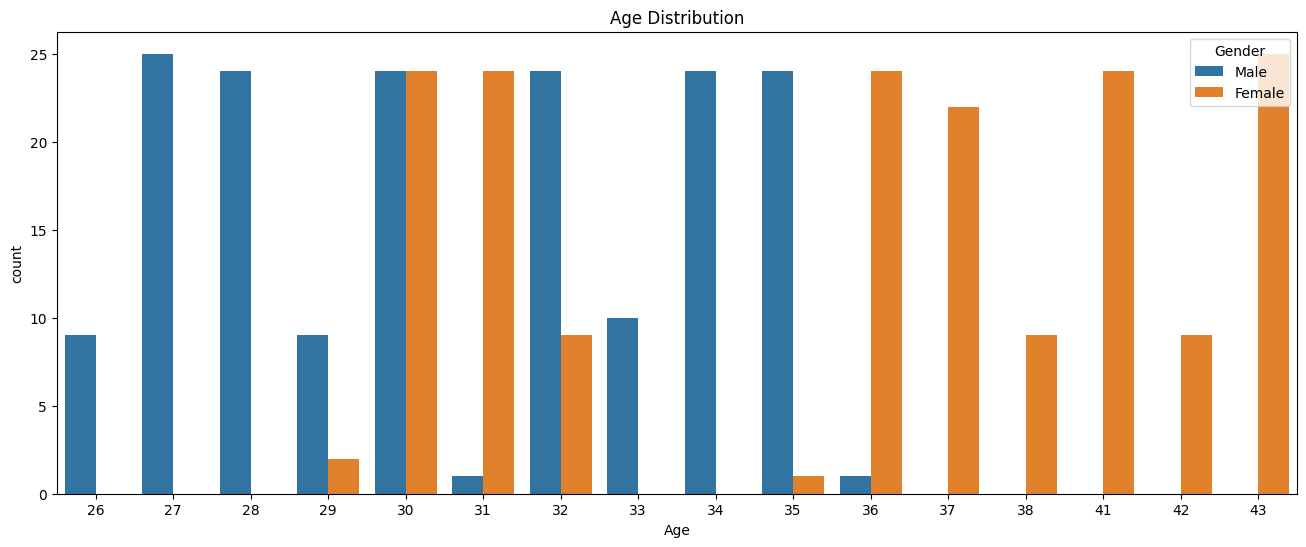

In [ ]:
# Gender && Age
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index().sort_values(ascending=False, by='count')
# visualize  age && gender
plt.figure(figsize=(16, 6))
sns.barplot(data=gender_age_data, x='Age', y='count', hue='Gender')
plt.title("Age Distribution")
plt.show()

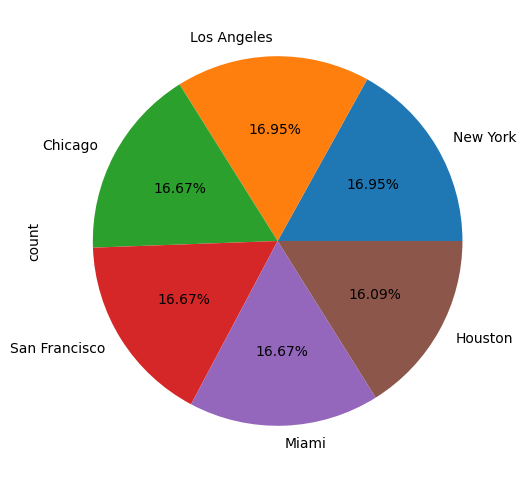

In [ ]:
# visualize customer by city
plt.figure(figsize=(10, 6))
df['City'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

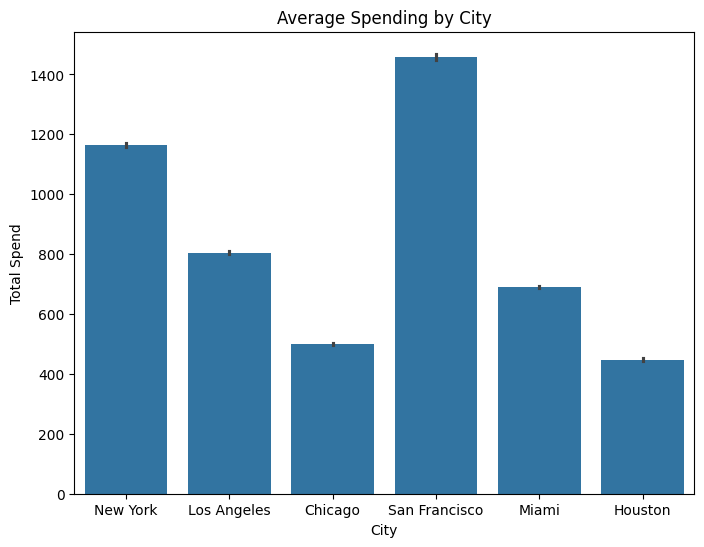

In [ ]:
# visualize the average spending by city
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='City', y='Total Spend')
plt.title("Average Spending by City")
plt.show()

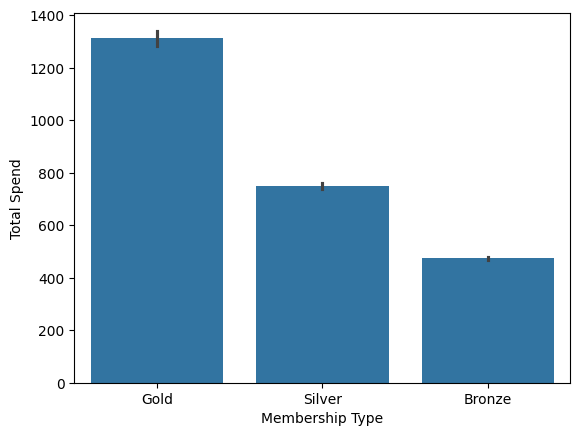

In [ ]:
# membership && average spend
sns.barplot(data=df, x='Membership Type', y='Total Spend')
plt.show()

In [ ]:
# making a new column for age group
age_grp=['21-30','31-43']
df['age_group'] = pd.cut(df.Age,bins=np.arange(15,46,15),labels=age_grp,right=True)
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,age_group
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,21-30
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,31-43
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,31-43
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,21-30
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,21-30


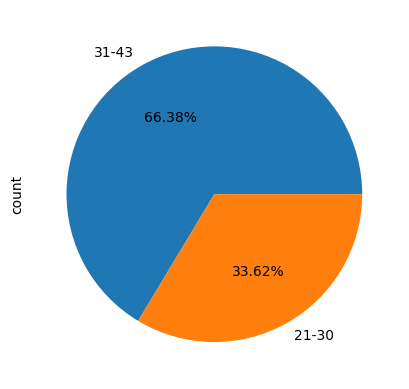

In [ ]:
# visualize the distribution of age groups
df['age_group'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

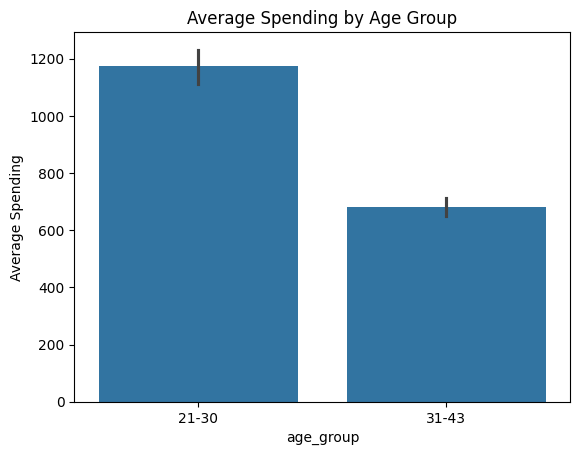

In [ ]:
# average spending by age group
sns.barplot(data=df, x='age_group', y='Total Spend')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

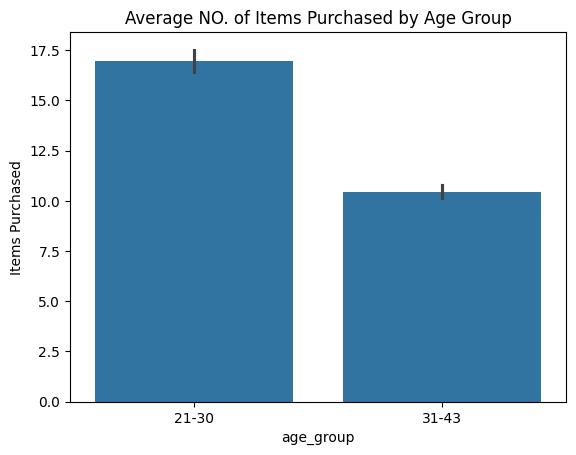

In [ ]:
# average number of items purchased by age group
sns.barplot(data=df, x='age_group', y='Items Purchased')
plt.title('Average NO. of Items Purchased by Age Group')
plt.show()

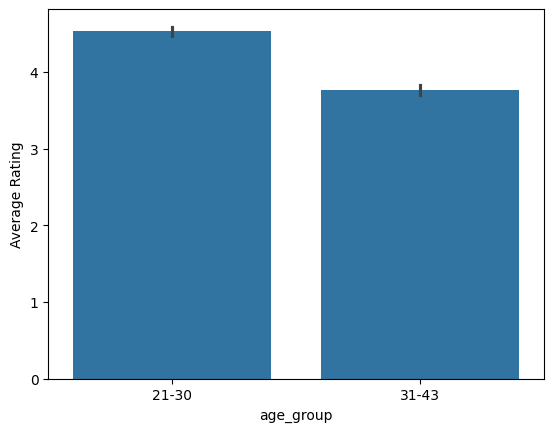

In [ ]:
# average Rating by Age Group
sns.barplot(data=df, x='age_group', y='Average Rating')
plt.show()

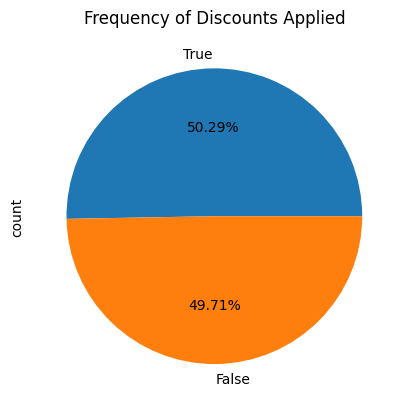

In [ ]:
# visualize the discount applied column
df['Discount Applied'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title("Frequency of Discounts Applied")
plt.show()

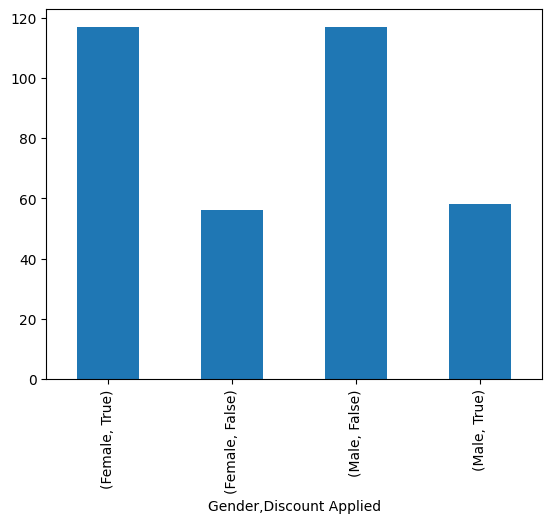

In [ ]:
# visualize the relation between gender and discount applied
gender_discount = df.groupby('Gender')['Discount Applied'].value_counts()
gender_discount.plot.bar()
plt.show()

<ipython-input-33-fb243ddb0483>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_discount = df.groupby('age_group')['Discount Applied'].value_counts()


<Axes: xlabel='age_group,Discount Applied'>

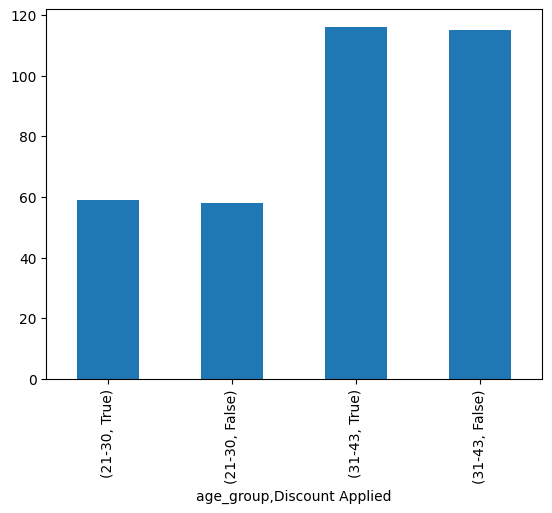

In [ ]:
# visualize the relation between the age group and discount applied
age_group_discount = df.groupby('age_group')['Discount Applied'].value_counts()
age_group_discount.plot.bar()

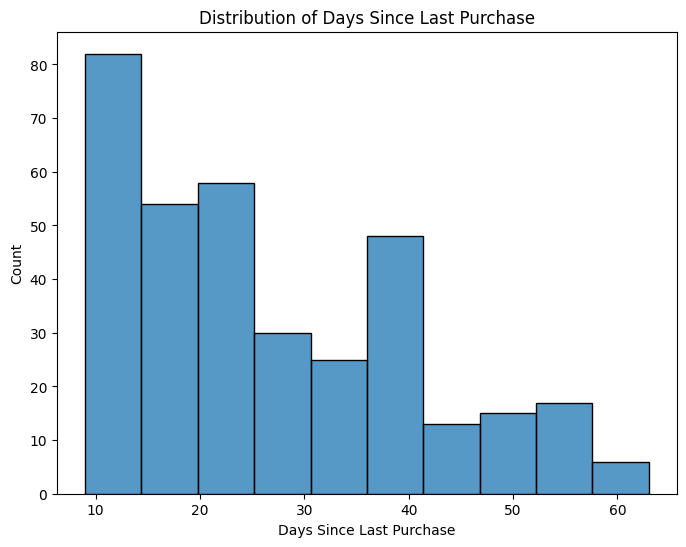

In [ ]:
# visualize the distribution of Days Since Last Purchase
plt.figure(figsize=(8, 6))
sns.histplot(df['Days Since Last Purchase'])
plt.title("Distribution of Days Since Last Purchase")
plt.show()

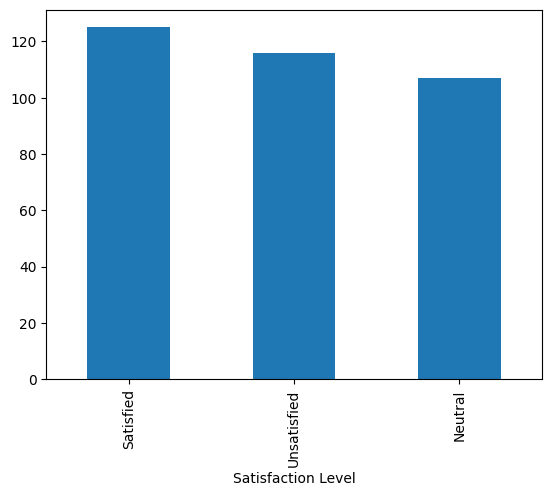

In [ ]:
# visualize the distribution of Satisfaction Level
df['Satisfaction Level'].value_counts().plot.bar()
plt.show()

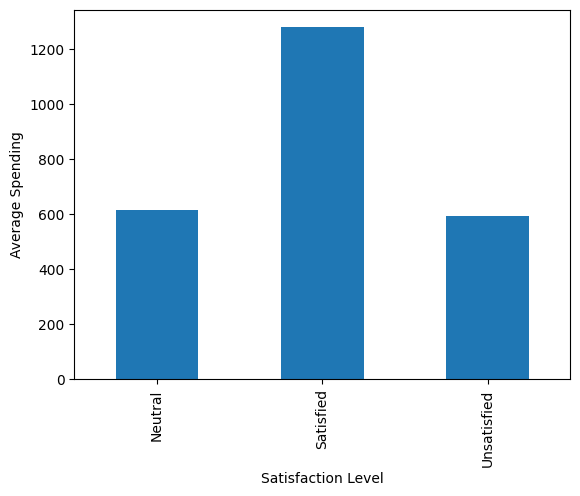

In [ ]:
# find the relation between Satistaction Level and average spend
satisfaction_spend = df.groupby('Satisfaction Level')['Total Spend'].mean()
satisfaction_spend.plot.bar()
plt.ylabel('Average Spending')
plt.show()

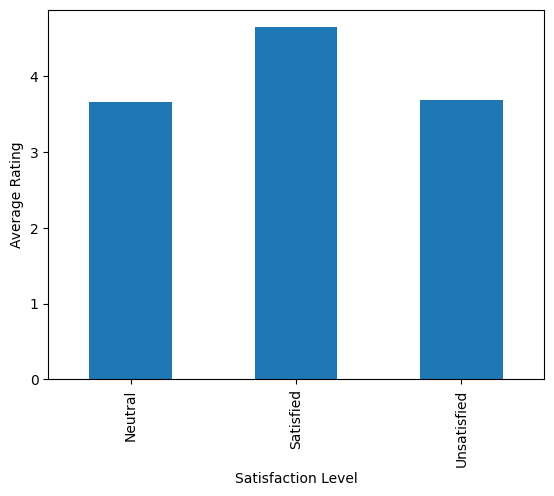

In [ ]:
# find the relation between Satistaction Level and average raing
satisfaction_rating = df.groupby('Satisfaction Level')['Average Rating'].mean()
satisfaction_rating.plot.bar()
plt.ylabel('Average Rating')
plt.show()

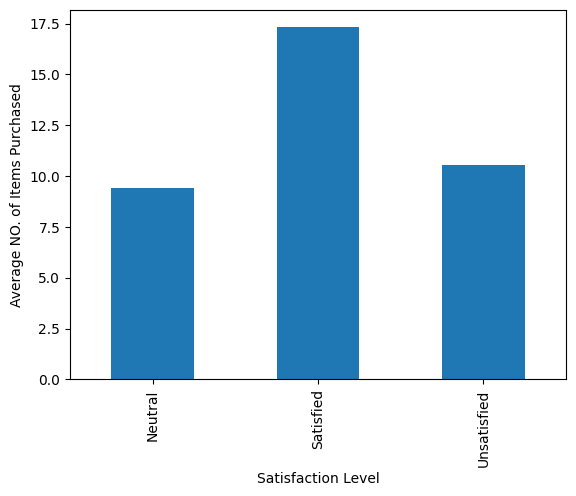

In [ ]:
# find the relation between Satistaction Level and items purchased
satisfaction_items = df.groupby('Satisfaction Level')['Items Purchased'].mean()
satisfaction_items.plot.bar()
plt.ylabel('Average NO. of Items Purchased')
plt.show()